C:\Users\Afnan\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Afnan\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Afnan\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Afnan\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Afnan\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7070
         1.0       0.73      0.79      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



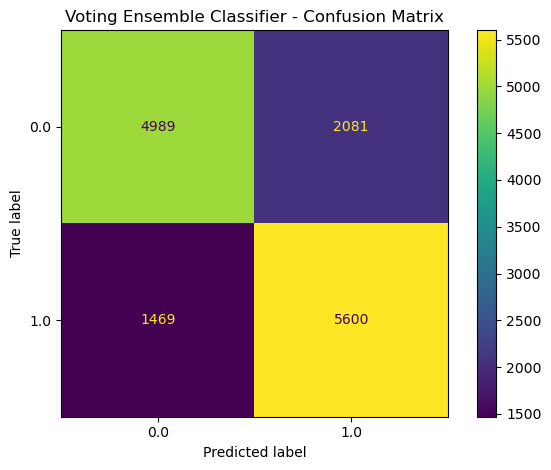

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# definnin base learners
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
rf = RandomForestClassifier(n_estimators=300, random_state=42)
knn = KNeighborsClassifier(n_neighbors=7)
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", n_estimators=200, random_state=42)
svc = SVC(probability=True, kernel="rbf", class_weight="balanced", random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=1000, early_stopping=True, random_state=42)

# voting classfier
voting_clf = VotingClassifier(
    estimators=[
        ("lr", log_reg),
        ("rf", rf),
        ("knn", knn),
        ("xgb", xgb),
        ("svc", svc),
        ("mlp", mlp)
    ],
    voting="soft", 
    n_jobs=-1
)

#  SMOTE + Scaling + Voting pipeline 
pipeline = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),
    ("voting", voting_clf)
])

# --- Train ---
pipeline.fit(X_train, y_train)

# --- Predict & Evaluate ---
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

# --- Confusion Matrix ---
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
import matplotlib.pyplot as plt
plt.title("Voting Ensemble Classifier - Confusion Matrix")
plt.tight_layout()
plt.show()


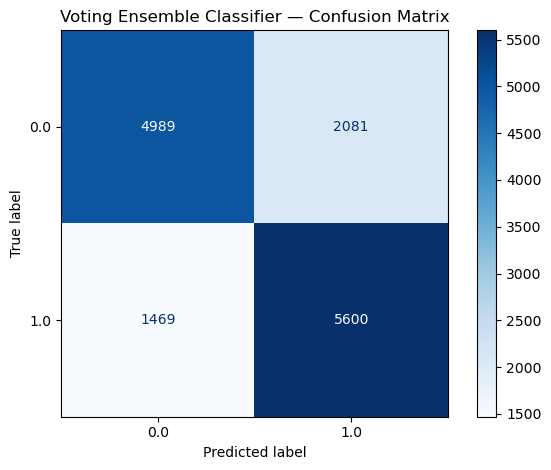

In [3]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap="Blues", values_format="d"
)
plt.title("Voting Ensemble Classifier — Confusion Matrix")
plt.tight_layout()
plt.show()


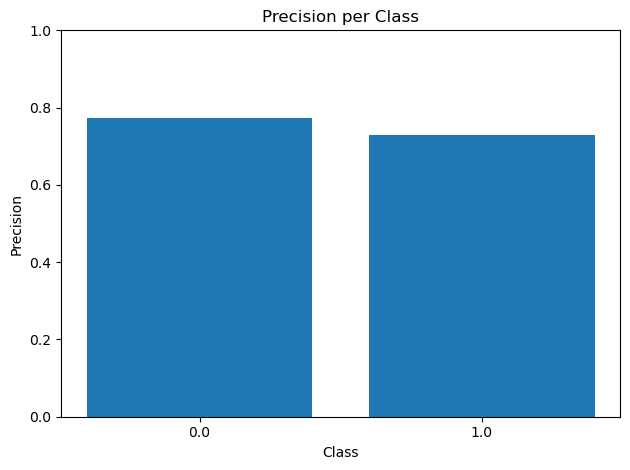

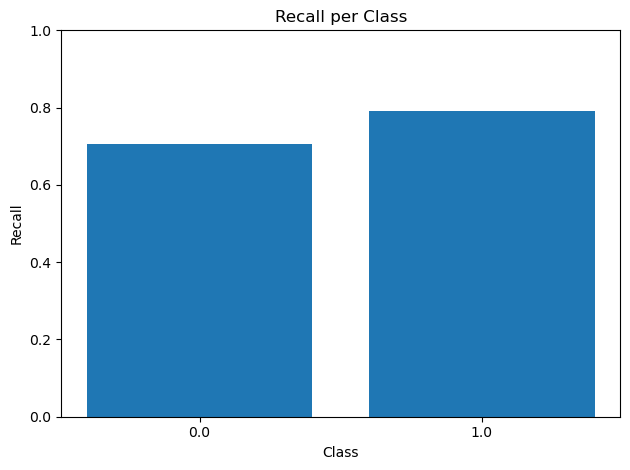

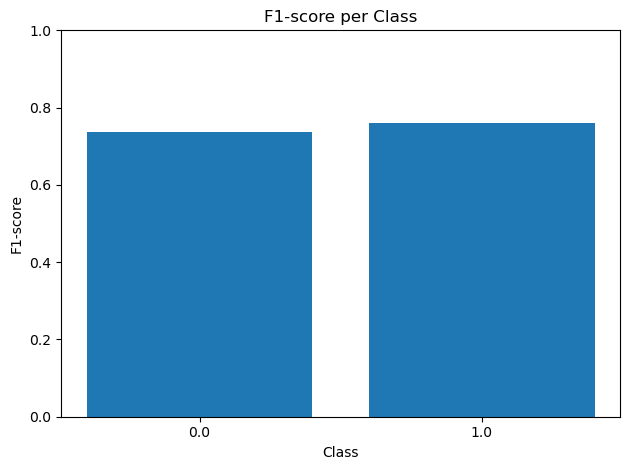

In [5]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Generate classification report dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Create bar chart for precision, recall, f1-score
metrics = ['precision', 'recall', 'f1-score']
classes = list(report.keys())[:-3]  # avoid 'accuracy', 'macro avg', 'weighted avg'

for metric in metrics:
    values = [report[cls][metric] for cls in classes]
    plt.bar(classes, values)
    plt.title(f"{metric.capitalize()} per Class")
    plt.ylim(0, 1)
    plt.ylabel(metric.capitalize())
    plt.xlabel("Class")
    plt.tight_layout()
    plt.show()


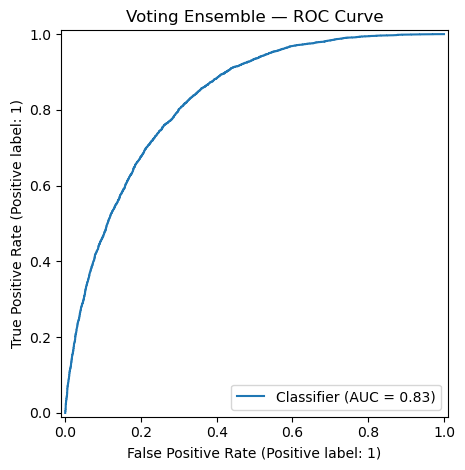

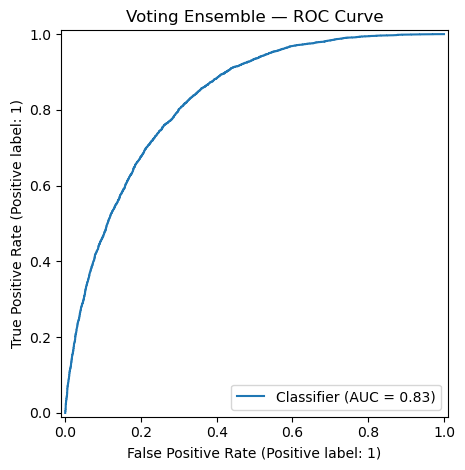

In [7]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_predictions(y_test, pipeline.predict_proba(X_test)[:, 1])
plt.title("Voting Ensemble — ROC Curve")
plt.tight_layout()
plt.show()
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_predictions(y_test, pipeline.predict_proba(X_test)[:, 1])
plt.title("Voting Ensemble — ROC Curve")
plt.tight_layout()
plt.show()
